<h2 style="text-align: center;"><b>Многослойная сеть на Keras</b></h3>

---

<h3 style="text-align: center;"><b>Компоненты нейросети</b></h3>

Здесь самое время напомнить о том, какие вещи играют принципиальную роль в построении любой ***нейронной сети*** (все их мы задаём *руками*, самостоятельно):  

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

<h3 style="text-align: center;"><b>Многослойная нейронная сеть</b></h3>

Как можно понять из названия, многослойная нейросеть состоит из нескольких **слоёв**. Каждый слой состоит из **нейронов**. Ранее мы уже писали свой нейрон на NumPy, вот из таких нейронов и состоит ***MLP (Multi-Layer Perceptron)***. Ещё такую многослойную нейросеть, у которой каждый нейрон на предыдущем уровне соединён с нейроном на следующем уровне, называют ***Fully-Connected-сетью*** (или ***Dense-сетью***).  

Расмотрим их устройство более подробно:

* Вот так выглядит двухслойная нейросеть (первый слой - input layer - не считается, потому что это, по сути, не слой):

<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" width=300, height=200>

* Так выглядит трёхслойная нейросеть:

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" width=400, height=300>

.. и так далее для большего случая слоёв.

**Обратите внимание:** связи есть у нейронов со слоя $L_{i-1}$  и нейронов $L_{i}$, но между нейронами в одном слое связей **нет**.

**Входной слой** -- это данные (матрица $(n, m)$).

Слои, которые не являются входными или выходными, называются **скрытыми слоями (hidden layers)**.

При решении ***задачи регрессии*** на **выходном слое** обычно один нейрон, который возвращает предсказанные числа (для каждого объекта по числу).  

В случае ***задачи классификации*** на **выходном слое** обычно один нейрон, если задача бинарной классификации, и $K$ нейронов, если задача $K$-класовой классификации.

#### Forward pass в MLP

Каждый слой многослойной нейросети - это матрица весов, столбцы которой -- это нейроны (один столбец - один нейрон). То есть один столбец -- это веса одного нейрона.

Допустим, мы решаем задачу $K$-классовой классификации (на последнем слое $K$ нейронов). Рассмотрим, как в таком случае выглядит `forward_pass` нейросети:

* Вход: $$X =
\left(
\begin{matrix} 
x_{11} & ... & x_{1M} \\
... & \ddots  & ...\\
x_{N1} & ... & x_{NM} 
\end{matrix}
\right)
$$

-- матрица $(N, M)$

* Структура сети - много слоёв, в слоях много нейронов. Первый слой (после входного) выглядит так:

$$ W^1 =
\left(
\begin{matrix} 
w_{11} & ... & w_{1L_1} \\
... & \ddots  & ...\\
w_{M1} & ... & w_{ML_1} 
\end{matrix}
\right)
$$

-- матрица $(M, L_1)$

То есть это в точности $L_1$ нейронов, каждый имеет свои собственные веса, их $M$ штук.

Мы помним, что нейрон - это линейное преобразование и потом нелинейная функция активации от этого преобразования. Однако в многослойных нейростеях часто отделяют `Linear` часть и `Activation`, то есть слоем считаем набор весов нейронов, а следующий слой всегда функция активации (у всех нейронов из слоя она одна и та же, обычно фреймворки не позволяют задавать конкретному нейрону в слое отличную от других нейронов в этом слое функцию активации, однако это легко сделать, объявив слой из одного нейрона).

* Другие слои выглядит точно так же, как первый слой. Например, второй слой будет такой:

$$ W^2 =
\left(
\begin{matrix} 
w_{11} & ... & w_{1L_2} \\
... & \ddots  & ...\\
w_{L_11} & ... & w_{L_1L_2} 
\end{matrix}
\right)
$$

-- матрица $(L_1, L_2)$

То есть это в точности $L_2$ нейронов, каждый имеет свои собственные веса, их $L_1$ штук.

* Выходной слой:  

Пусть в нейросети до выходного слоя идут $t$ слоёв. Тогда выходной слой имеет форму:

$$ W^{out} =
\left(
\begin{matrix} 
w_{11} & ... & w_{1K} \\
... & \ddots  & ...\\
w_{L_t1} & ... & w_{L_tK} 
\end{matrix}
\right)
$$

-- матрица $(L_t, K)$, где $L_t$ - количество нейронов в $t$-ом слое, а $K$ -- количество классов.

В итоге *для `forward_pass` нам нужно просто последовтельно перемножить матрицы друг за другом, применяя после каждого умножения соответсвующую функцию активации*.

*Примечание*: можно думать об умножении на очередную матрицу весов как на переход в **новое признаковое пространство**. Действительно, когда подаём матрицу $X$ и умножаем на матрицу первого слоя, мы получаем матрицу размера $(N, L_1)$, то есть как будто $L_1$ "новых" признаков (построенных как линейная комбинация старых до применения функции активации, и уже как нелинейная комбинация после активации). Здесь уместно вспомнить, что Deep Learning является пообластью Representation Learning, то есть позволяет выучивает новые представляения данных.

**Backward pass в MLP**

Обучается с помощью метода "Error Backpropagation" - ["Обратное распространение ошибки"](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8), принцип распространения очень похож на то, как мы обучали один нейрон - это градиентный спуск, но по "всей нейросети" сразу.  

Backpropagation работает корректно благодаря ***chain rule*** (=правилу взятия производной сложной функции):  

Если $f(x) = f(g(x))$, то:  

$$\frac{\partial{f}}{\partial{x}} = \frac{\partial{f}}{\partial{g}} \frac{\partial{g}}{\partial{x}}$$

Более подробно про backpropagation можно прочитать здесь (на английском):  https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

#Создание двухслойной нейросети
Cоздадим двухслойную нейросеть из 100 нейронов:

In [6]:
import matplotlib.pyplot as plt
import numpy as np

import keras

/home/andor/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/home/andor/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["[Errno 2] The file to load file system plugin from does not exist.: '/home/andor/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/home/andor/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/home/andor/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/home/andor/.local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: cannot open shared object file: No s

Генерация датасета:

In [7]:
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

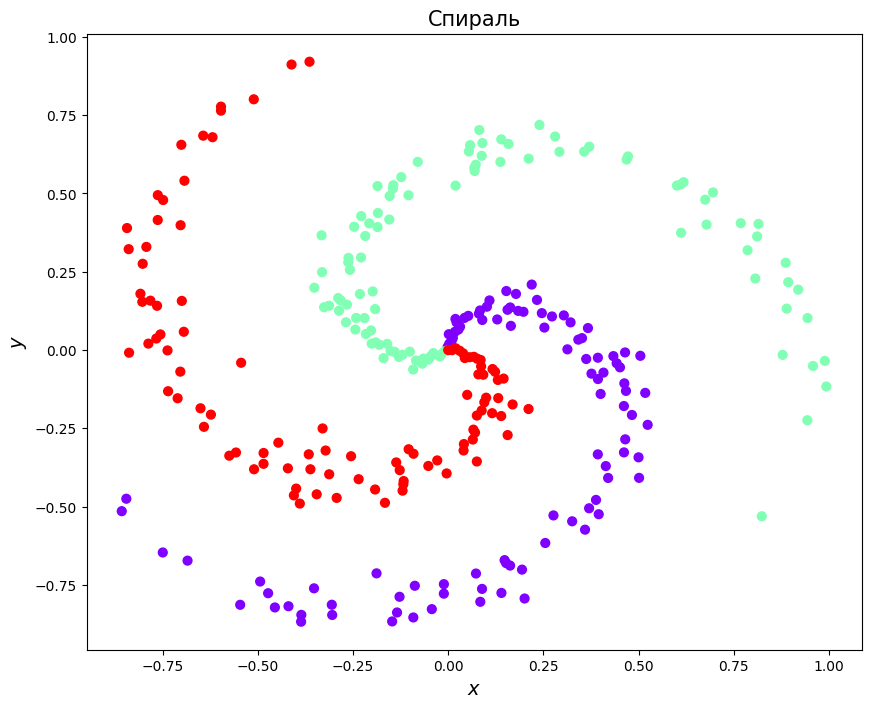

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

In [9]:
print(X.data.shape, y.data.shape)

(300, 2) (300,)


In [10]:
y = keras.utils.to_categorical(y, 3)


In [11]:
from keras import optimizers
two_layer_net=keras.models.Sequential()
two_layer_net.add(keras.layers.Dense(100, input_shape=(X.shape[1],), activation='relu'))
two_layer_net.add(keras.layers.Dense(3, activation='softmax'))
print(two_layer_net.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
#визуализация модели
from keras.utils.vis_utils import plot_model
plot_model(two_layer_net, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [14]:
sgd = optimizers.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=0.01)
two_layer_net.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history=two_layer_net.fit(X, y, epochs=150, batch_size=64, verbose=0, validation_split=0.2)


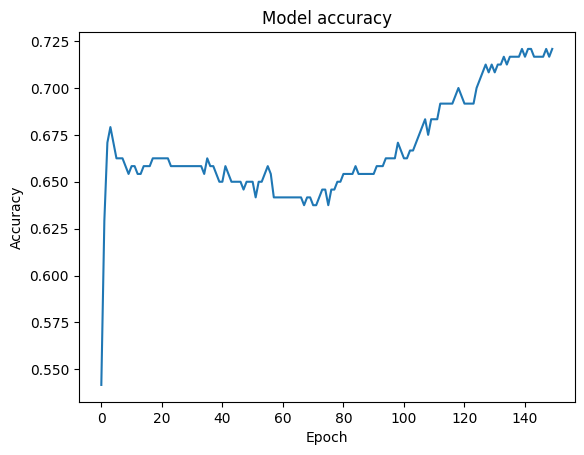

In [15]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train','test'])
plt.show()

#Создание многослойной нейросети
Усложним архитектуру нейронной сети прямого распрастронения:

In [16]:
many_layer_net=keras.models.Sequential()
two_layer_net.add(keras.layers.Dense(100, input_shape=(X.shape[1],), activation='relu'))
two_layer_net.add(keras.layers.Dense(100, activation='relu'))
two_layer_net.add(keras.layers.Dense(100, activation='relu'))
two_layer_net.add(keras.layers.Dense(3, activation='softmax'))
sgd = optimizers.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=0.001)
two_layer_net.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history=two_layer_net.fit(X, y, epochs=150, batch_size=64, verbose=0, validation_split=0.2)


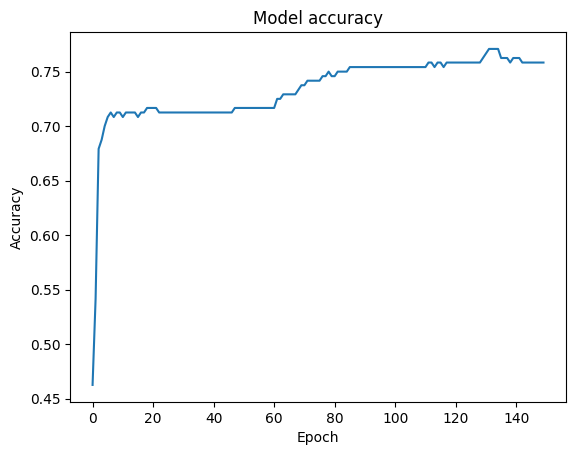

In [17]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Задание 1
1. Попробовать улучшить результат за счет изменения следующих параметров: скорость обучения, количество эпох, виды оптимизаторов, количество нейронов, количество слоев. Результаты анализа представить в виде графиков (диаграмм)
2. Добавить слой (слои) Dropout (model.add(keras.layers.Dropout(0.5))), посмотреть как измениться результат
3. Добавить слой нормализации (keras.layers.BatchNormalization) и оценить его влияние на качество обучения.  

## Создание многослойной нейросети для классификации рукописных цифр

In [18]:
import keras

from keras.datasets import mnist
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Sequential
from keras.optimizers import adam_v2
from keras.utils import np_utils
from keras.utils import np_utils

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

number_of_classes = 10

11490434/11490434 [==============================] - 8s 1us/step


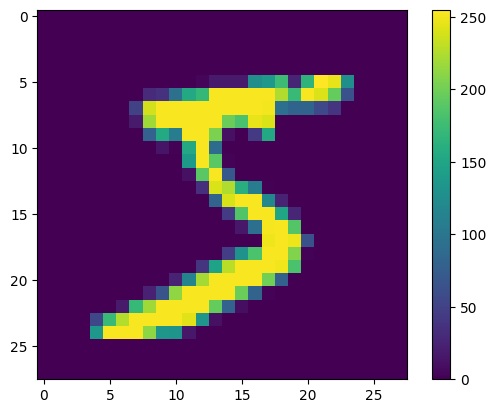

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)


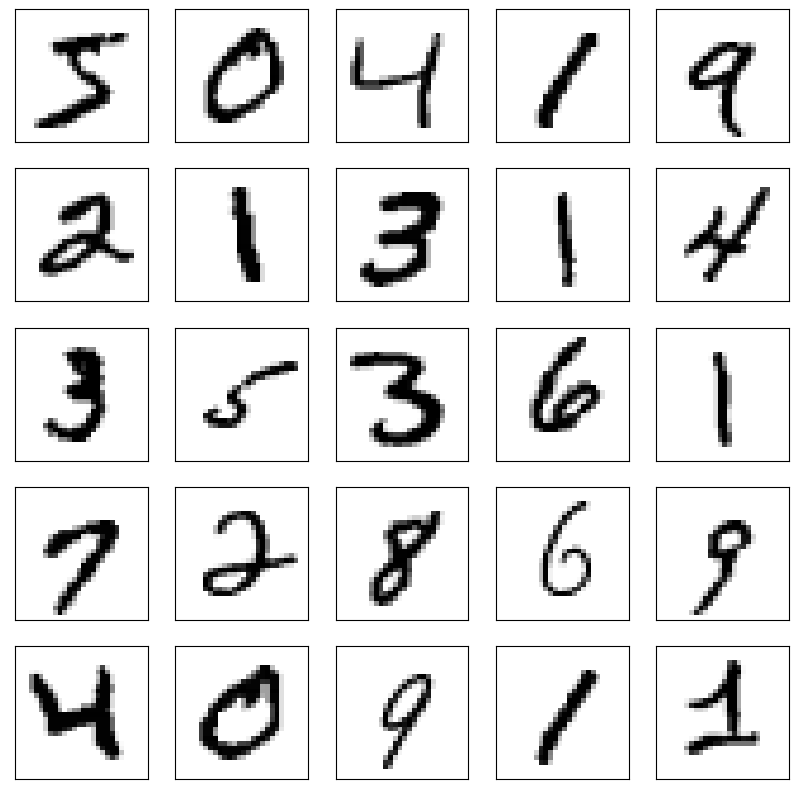

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    

In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]).astype('float32')

#для преобразования двумерных данных в одномерные в нейронной сети можно использовать слой Flatten(input_shape=(28,28))

X_train/=255
X_test/=255

y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [22]:
X_train.shape

(60000, 784)

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(512, input_dim=(X_train.shape[1]), activation='relu'))
model.add(keras.layers.Dense(number_of_classes, activation='softmax'))
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200)


Epoch 1/5


2023-02-24 21:17:12.817834: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


299/300 [============================>.] - ETA: 0s - loss: 0.3059 - accuracy: 0.9131

2023-02-24 21:17:15.956915: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


300/300 [==============================] - 3s 9ms/step - loss: 0.3055 - accuracy: 0.9132 - val_loss: 0.1545 - val_accuracy: 0.9552
Epoch 2/5
300/300 [==============================] - 2s 8ms/step - loss: 0.1240 - accuracy: 0.9644 - val_loss: 0.1082 - val_accuracy: 0.9674
Epoch 3/5
300/300 [==============================] - 2s 8ms/step - loss: 0.0824 - accuracy: 0.9763 - val_loss: 0.0828 - val_accuracy: 0.9748
Epoch 4/5
300/300 [==============================] - 2s 8ms/step - loss: 0.0598 - accuracy: 0.9829 - val_loss: 0.0752 - val_accuracy: 0.9766
Epoch 5/5
300/300 [==============================] - 2s 7ms/step - loss: 0.0446 - accuracy: 0.9870 - val_loss: 0.0671 - val_accuracy: 0.9799


In [27]:
#оценка точности
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

  1/313 [..............................] - ETA: 28s - loss: 0.0174 - accuracy: 1.0000

2023-02-24 21:17:27.807122: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.0671 - accuracy: 0.9799
Test accuracy: 0.9799000024795532
Test loss: 0.06706682592630386


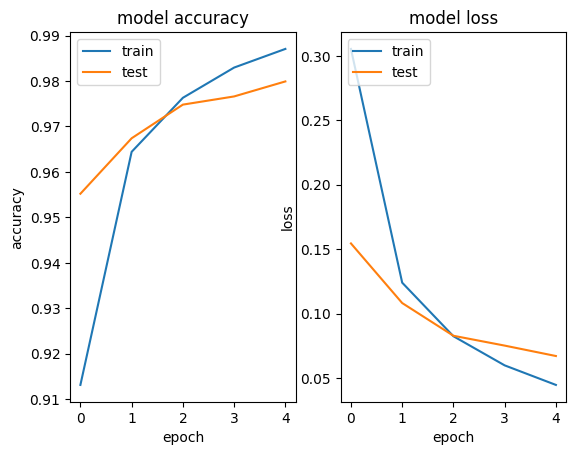

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set(title='model accuracy')
ax1.set(ylabel='accuracy')
ax1.set(xlabel='epoch')
ax1.legend(['train', 'test'], loc='upper left')
ax2 = fig.add_subplot(1,2,2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set(title='model loss')
ax2.set(ylabel='loss')
ax2.set(xlabel='epoch')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()


# Задание 2
1. Между двух слоев нейронной сети добавить слой Dropout
model.add(keras.layers.Dropout(0.5)), переобучить модель, оценить качество обучения. 
Объяснить полученные результаты
2. Добавить еще один скрытый слой и проанализировать его влияние на качество обучения модели. 

#Инициализация сети
Важным моментом при конструировании сети является начальная инициализация весов. Удачно выбранный способ инициализации весов может значительно влиять на способность модели к обучению. 

Существует различные подходы к начальной инициализации весов.

Например, метод Завьера. Основная идея этого метода — упростить прохождение сигнала через слой во время как прямого, так и обратного распространения ошибки для линейной функции активации (этот метод также хорошо работает для сигмоидной функции, так как участок, где она ненасыщена, также имеет линейный характер). При вычислении весов этот метод опирается на вероятностное распределение.

Метод инициализации Ге (He) — это вариация метода Завьера, больше подходящая функции активации ReLU, компенсирующая тот факт, что эта функция возвращает нуль для половины области определения.

Выделяют также метод ортогональной инициализации. 

In [10]:
model_reg = keras.models.Sequential()
model_reg.add(keras.layers.Dense(512, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='he_uniform'))
model_reg.add(keras.layers.Dense(number_of_classes, activation='softmax', kernel_initializer='glorot_uniform'))

#L2-регуляризация
Одной из основных проблем машинного обучения является проблема переобучения (overfitting), когда модель в погоне за минимизацией затрат на обучение теряет способность к обобщению.

Существует простой способ держать переобучение под контролем — метод dropout.

Но есть и другие регуляризаторы, которые можно применить к сети. Один из них — L_2-регуляризация (также называемая сокращением весов, англ. weight decay), которая использует более прямой подход к регуляризации, чем dropout. Обычно первопричиной переобучения является сложность модели (в смысле количества ее параметров), слишком высокая для решаемой задачи и имеющегося обучающего множества. В некотором смысле, задача регуляризатора — понизить сложность модели, сохранив количество ее параметров. 

L_2-регуляризация выполняется посредством наложения штрафов (penalising) на веса с наибольшими значениями, минимизируя их L_2-норму с использованием параметра λ — коэффициент регуляризации, выражающий предпочтение минимизации нормы относительно минимизации потерь на обучающем множестве.

Крайне важно правильно выбрать λ. Если коэффициент слишком мал, то эффект от регуляризации будет ничтожен, если же слишком велик — модель обнулит все веса.

In [11]:
from keras.regularizers import l2
l2_lambda = 0.0001
model_reg = keras.models.Sequential()
model_reg.add(keras.layers.Dense(512, input_dim=(X_train.shape[1]), activation='relu',kernel_initializer='he_uniform', bias_regularizer=l2(l2_lambda)))
model_reg.add(keras.layers.Dense(number_of_classes, activation='softmax', kernel_initializer='glorot_uniform'))

In [12]:
model_reg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model_reg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200)

Epoch 1/5
300/300 [==============================] - 4s 11ms/step - loss: 0.3025 - accuracy: 0.9155 - val_loss: 0.1496 - val_accuracy: 0.9568
Epoch 2/5
300/300 [==============================] - 4s 12ms/step - loss: 0.1243 - accuracy: 0.9647 - val_loss: 0.1078 - val_accuracy: 0.9690
Epoch 3/5
300/300 [==============================] - 3s 10ms/step - loss: 0.0813 - accuracy: 0.9771 - val_loss: 0.0843 - val_accuracy: 0.9751
Epoch 4/5
300/300 [==============================] - 3s 10ms/step - loss: 0.0588 - accuracy: 0.9832 - val_loss: 0.0760 - val_accuracy: 0.9778
Epoch 5/5
300/300 [==============================] - 3s 10ms/step - loss: 0.0447 - accuracy: 0.9870 - val_loss: 0.0735 - val_accuracy: 0.9785


# Задание 3
Измените коэффициент регуляризации на значение 0.5; 0.01 и 1, оцените влияние значения коэффициента на точность сети

Попробуйте использовать схему регуляризации L1 (bias_regularizer=tf.keras.regularizers.l1(0.0001)), сравните точности модели при L1 и L2 регуляризации. 



# Применение обученной нейронной сети
Необходимо нарисовать цифру (например в Paint) или скачать из Интернета

1/1 [==============================] - 0s 86ms/step
[6.0921124e-14 1.8184616e-15 1.4049347e-07 1.3420475e-03 6.2345102e-30
 9.9865711e-01 2.5396324e-11 6.8611291e-07 8.1279858e-11 1.2101407e-17]


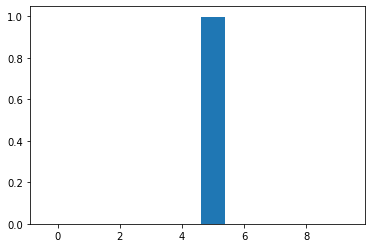

5


In [ ]:
#выполняем преобразование картинки с цифрой
from PIL import Image
#преобразование входного изображения в формат набора MNIS
image=Image.open("cifra-2.png").resize((28,28))
img = np.invert(image.convert('L')).ravel()
im2arr = img.reshape(1, 28* 28).astype('float32')/255
#plt.imshow(image, cmap=plt.cm.binary)
#использование обученной модели
y_pred = model.predict(im2arr)
print(y_pred[0]) 
plt.bar(range(10), y_pred[0])
plt.show()
print(np.argmax(y_pred))

In [ ]:
#сохранение модели
model.save('model.h5') 

#загрузка модели
#model_load=keras.models.load_model('model.h5')

# Задание 4
Описать архитектуру многослойной нейронной сети для классификации вина (использовать датасет из scikit learn), обучить ее, проверить качество обучения, использовать для предсказания и сохранить

# Задание 5
Решить задачу классификации или регрессии для датасета, найденного в 1 практической работе 